In [ ]:
# .py

import pandas as pd 
import numpy as np 
from scipy.stats import pearsonr

path = "../Resources/Advertising.csv"
adv = pd.read_csv(path)
adv.drop(columns="Unnamed: 0", inplace=True)
class LinearRegression():
    def __init__(self, X, Y):
        self.X = np.array(X)
        # This is a quirky way of defining Y, but this way you can also extract the column name from Y
        # not that you need it 
        self.Y = np.array(Y[Y.columns[0]])
        self.X_column_names = list(X.columns)
        self.Y_column_names = list(Y.columns)
    
    
    def ordinary_least_square(self):
        # Vad gör np.linalg.pinv och var tog ^-1 inversen vägen? 
        # Också känd som b 
        CSX = self.column_stack()
        return np.linalg.pinv(CSX.T @ CSX) @ CSX.T @ self.Y
    
    def column_stack(self):
        return np.column_stack([np.ones(self.Y.shape[0]), self.X])
    
    def sse(self):
        b = self.ordinary_least_square()
        k = len(b)-1
        n = self.Y.shape[0]
        return np.sum(np.square(self.Y - (self.column_stack()@b)))

    # Confidence(?)
    def con(self):
        # I think 'd' in the lab is the same as 'k' in the code along
        b = self.ordinary_least_square()
        k = len(b)-1
        n = self.Y.shape[0]
        # ssr = syy - sse, k = d,  var = Sigma Hat Squared
        return (self.ssr()/k)/self.var()

    def syy(self):
        return np.sum(np.square(self.Y)) - (np.square(np.sum(self.Y))/n)

    # Significance(?)
    def ssr(self):
        # In the lab its see - syy 
        # but in the code along its sse - syy 
        # but it only effects the polarity so maybe it doesn't matter
        return self.syy() - self.sse()

    # variance aka Sigma Hat Squared
    def var(self):
        # Maybe unnessary to have these in two places
        # Note that you maye need one more step S = np.sqrt(var)
        b = self.ordinary_least_square()
        k = len(b)-1
        n = self.Y.shape[0]
        return self.sse()/(n-k-1)

    def r(self):
        # Is there a manual version or should one use the library method?
        # return pearsonr(self.X.T[column], self.Y)
        result = ""
        for idx in range(len(self.X_column_names)):
            p = pearsonr(self.X.T[idx], self.Y)      
            col = self.X_column_names[idx]
            result += f"{col:>10} : Statistics = {p[0]:<20} pvalue = {p[1]}\n"
            #result += f"{col} : {p["statistic"]}, {p["pvalue"]}"
        return result

    def R2(self):
        return self.ssr()/self.syy()


lr = LinearRegression(adv[["TV","radio","newspaper"]],adv[["sales"]])

b = lr.ordinary_least_square()
X = lr.column_stack()
sse = lr.sse()
r = lr.r()
#print(r)
var = lr.var()
ssr = lr.ssr()
con = lr.con()
R2 = lr.R2()



__main__.LinearRegression

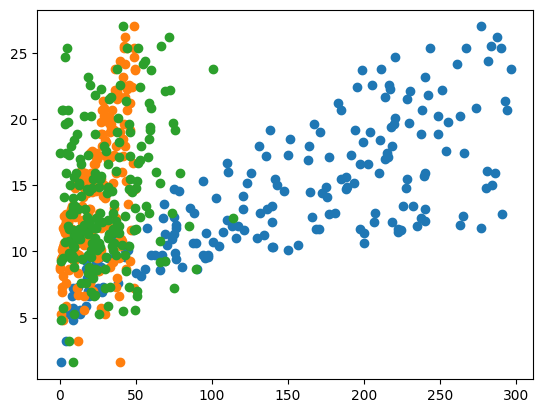

In [116]:
import matplotlib.pyplot as plt 
plt.scatter(adv["TV"],adv["sales"] )
plt.scatter(adv["radio"],adv["sales"] )
plt.scatter(adv["newspaper"],adv["sales"] )
#x = np.linspace(0,300)
#y_hat = b[0] + b[1]*x
#plt.plot(x, y_hat, c="red")

556.8252629021872